In [1]:
#import section
%matplotlib inline
import networkx as nx
import itertools
import random

In [2]:
#usage of random

p = 0.75
for _ in range(10):
    r = random.random()
    if r < p: print('1')
    else: print('2')

1
1
1
1
2
1
1
1
1
1


In [12]:
names = ['doaa', 'saadeldeen',  'yassen','ahmed']
random.choice(names)

'ahmed'

In [13]:
G = nx.cycle_graph(5)
random.sample(G.nodes, 3)


[4, 2, 0]

In [19]:
tickets = [1, 3, 4,5]

for _ in range(10):
    print(random.choices(names, tickets))

['ahmed']
['Saadeldeen']
['Saadeldeen']
['yassen']
['Doaa']
['Doaa']
['Doaa']
['Doaa']
['ahmed']
['Saadeldeen']


In [20]:
list(itertools.combinations(names, 2))

[('Doaa', 'Saadeldeen'),
 ('Doaa', 'yassen'),
 ('Doaa', 'ahmed'),
 ('Saadeldeen', 'yassen'),
 ('Saadeldeen', 'ahmed'),
 ('yassen', 'ahmed')]

In [21]:
G = nx.Graph()
G.add_nodes_from(names)

list(itertools.combinations(G.nodes, 2))

[('Doaa', 'Saadeldeen'),
 ('Doaa', 'yassen'),
 ('Doaa', 'ahmed'),
 ('Saadeldeen', 'yassen'),
 ('Saadeldeen', 'ahmed'),
 ('yassen', 'ahmed')]

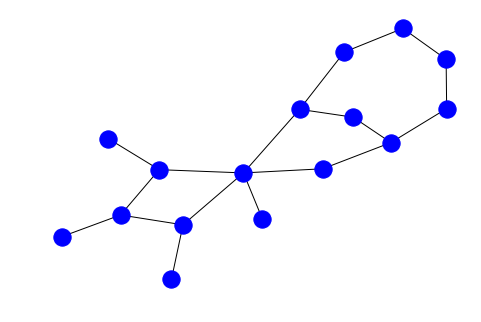

In [41]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G
G = gnm_random_graph(16, 18)
nx.draw(G,node_color = "blue")

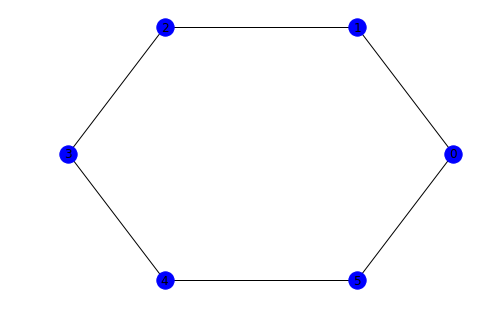

In [40]:
N = 6
G = nx.cycle_graph(N)
nx.draw_circular(G, with_labels=True,node_color = "blue")

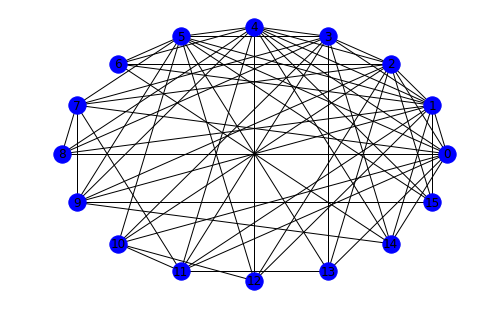

In [42]:
k = 4

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True,node_color = "blue")

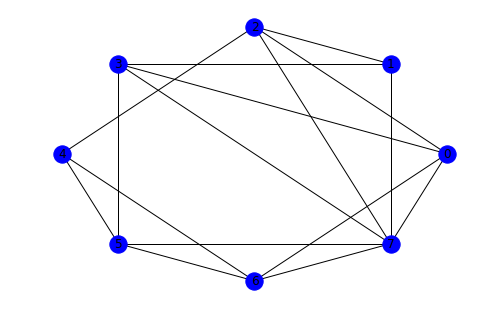

In [45]:
def watts_strogatz_graph(N, k, p):
    # 1. Create a ring of N nodes
    G = nx.cycle_graph(N)

    # 2. Connect each node n to k nearest neighbors
    #    [n-(k//2), ... , n-1, n+1, ... , n+(k//2)]
    for n in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N 
            G.add_edge(n, left)
            G.add_edge(n, right)
    
    # 3. Rewire edges with probability p
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G
G = watts_strogatz_graph(8, 4, 0.2)
nx.draw_circular(G, with_labels=True,node_color="blue")

[4, 1, 1, 1, 1]


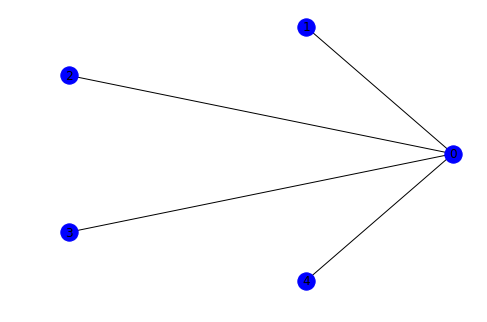

In [46]:
G = nx.star_graph(4)
degrees = [G.degree(n) for n in G.nodes]

print(degrees)
nx.draw_circular(G, with_labels=True,node_color="blue")

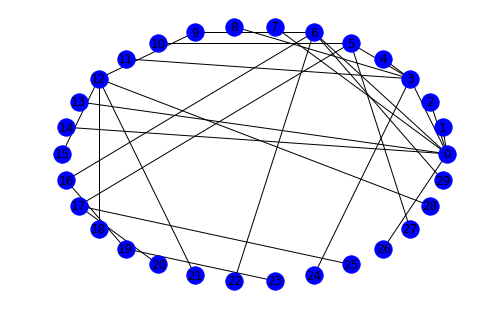

In [47]:
def barabasi_albert_graph(N, m):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G
G = barabasi_albert_graph(30, 1)
nx.draw_circular(G, with_labels=True,node_color="blue")